In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import re
# import string
# import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import spacy
# from spacy.lemmatizer import Lemmatizer
# from spacy.lang.en.stop_words import STOP_WORDS

# from tqdm import tqdm_notebook as tqdm
# from pprint import pprint

In [2]:
df=pd.read_csv('amazon_alexa.tsv', sep='\t')

In [3]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [5]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [6]:
df['review_length']=df['verified_reviews'].apply(len)
df.head()

,rating,date,variation,verified_reviews,feedback,review_length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [ ]:
df.groupby('rating').describe()


In [ ]:
ratings=df['rating'].value_counts()

fig = px.funnel_area(names=ratings.index,
                    values=ratings.values,
                    title='Distribution of Alexa Ratings')
fig.show()

In [ ]:
feedback=df['feedback'].value_counts()
fig = px.pie(df, values=feedback.values, names=feedback.index,
            title='Distribution of Feedback')
fig.show()

In [ ]:
reviews=px.histogram(df,x="review_length",title='Distribution of Length of Reviews',labels={"review_length":"Review Length"})
reviews.show()


In [ ]:
reviews=px.histogram(df,x="review_length",color='feedback',title='Distribution of Length of Reviews by Feedback',labels={"review_length":"Review Length"})
reviews.show()


In [ ]:
fig = px.bar(df, x="rating", y="review_length") 
fig.show()

# Data Cleaning

In [7]:
# INITIALIZE SPACY
nlp = spacy.load('en', disable=['parser', 'ner'])

In [8]:
# MAKE LOWERCASE
df['new_reviews'] = df['verified_reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['new_reviews'].head()

0                                        love my echo!
1                                            loved it!
2    sometimes while playing a game, you can answer...
3    i have had a lot of fun with this thing. my 4 ...
4                                                music
Name: new_reviews, dtype: object

In [9]:
# REMOVE PUNCTUATION
df['new_reviews'] = df['new_reviews'].str.replace('[^\w\s]','')
df['new_reviews'].head()

0                                         love my echo
1                                             loved it
2    sometimes while playing a game you can answer ...
3    i have had a lot of fun with this thing my 4 y...
4                                                music
Name: new_reviews, dtype: object

In [10]:
# REMOVE EMOJI
#REFERENCE : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [11]:
df['new_reviews'] = df['new_reviews'].apply(lambda x: remove_emoji(x))

In [12]:
# REMOVE STOP WORDS
stop = stopwords.words('english')
df['new_reviews'] = df['new_reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['new_reviews'].sample(30)

2818                                         love helpful
937                                listen music set timer
2821    echo dot two weeks fun set morning alarms chec...
2157    fire tv stick easy set use downfall subscripti...
205     got great sound bass doesnt work time still ho...
2775                                                     
701     without cellphone cannot use many features ipa...
2472    nope still lot improved things ask says hmmmm ...
1428    love device upgraded echo spot wish could cust...
108     still great productbut sound quality seem wors...
2165    fire stick amazing easy setup easy use awesome...
1575    two weeks sure like ever present alexa screen ...
1873    like list ability music play like create playl...
261     already alexa amazon find today could resist g...
1600                         love thanks amazon guys rock
2713    super easy hook program use music feature love...
1070                                   slow compared echo
1586    love k

In [14]:
# LEMMATIZATION
def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])   

df['new_reviews']= df['new_reviews'].apply(space)

In [ ]:
# freq = pd.Series(' '.join(df['new_reviews']).split()).value_counts()[:50]
# freq

In [16]:
# CREATE DICTIONARY TO DO COUNT
count_dict_alex = {}

for doc in df['new_reviews']:
    for word in doc.split():
        if word in count_dict_alex.keys():
            count_dict_alex[word] +=1
        else:
            count_dict_alex[word] = 1
            
for key, value in sorted(count_dict_alex.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

dinosaur: 1
category: 1
grandaughter: 1
2000: 1
mile: 1
timermusic: 1
duty: 1
boost: 1
definitively: 1
input: 1
select: 1
encyclopedia: 1
greatit: 1
thermostatand: 1
lightswithout: 1
chair: 1
dislikes: 1
pauses: 1
pattern: 1
promp: 1
poop: 1
joke34: 1
naw: 1
outsmart: 1
echosecho: 1
6th: 1
divertido: 1
1000: 1
speaknspell: 1
iove: 1
soundgood: 1
fm: 1
native: 1
americans: 1
whose: 1
texas: 1
birth: 1
additionally: 1
marginal: 1
extender: 1
ten: 1
disconnected: 1
dust: 1
collector: 1
broken: 1
34fixes34: 1
satisfy: 1
34never: 1
34certified: 1
acknowledge: 1
indicate: 1
perfectlyvery: 1
productsand: 1
journey: 1
daytoday: 1
surely: 1
portion: 1
leary: 1
puny: 1
wear: 1
tear: 1
mint: 1
teenager: 1
insist: 1
yelling: 1
dinneras: 1
lifechange: 1
simplicity: 1
gazebo: 1
sortof: 1
complaini: 1
charging: 1
timework: 1
diagnostic: 1
roomba: 1
sentence: 1
onehonestly: 1
productonce: 1
itthis: 1
shocked: 1
clone: 1
boat: 1
garage: 1
loli: 1
gf: 1
intermittently: 1
pulsate: 1
pulse: 1
buddy: 1
eas

got: 2
dayuse: 2
oven: 2
speakeri: 2
bandwagon: 2
struggle: 2
sharing: 2
linksplug: 2
reliable: 2
qualty: 2
dropping: 2
compound: 2
projection: 2
awkward: 2
student: 2
dorm: 2
spacing: 2
easier: 2
smarter: 2
smarthome: 2
alright: 2
reputation: 2
nois: 2
quiz: 2
shoot: 2
phonetically: 2
proper: 2
development: 2
british: 2
accentthe: 2
restrictive: 2
refined: 2
linking: 2
monthsthey: 2
informed: 2
argue: 2
imusic: 2
structure: 2
affordable: 2
lullaby: 2
survive: 2
relate: 2
x: 2
bell: 2
whistle: 2
timersthe: 2
satisifie: 2
downstairsso: 2
flexible: 2
figuring: 2
1010: 2
humour: 2
booksthe: 2
nowhere: 2
wishing: 2
solely: 2
presumably: 2
buzzing: 2
putting: 2
greathave: 2
musicchecke: 2
weathera: 2
king: 2
cutie: 2
askmy: 2
sanity: 2
infodot: 2
choppy: 2
domain: 2
city: 2
dial: 2
lame: 2
34spying34: 2
legally: 2
godsend: 2
extended: 2
speakerstereo: 2
shipment: 2
wattage: 2
alli: 2
obsess: 2
stair: 2
gotten: 2
certainly: 2
unexpected: 2
seam: 2
thiswont: 2
organized: 2
maintain: 2
smith: 

In [ ]:
# low_value = 20
# bad_words = [key for key in count_dict_alex.keys() if count_dict_alex[key] < low_value]

In [ ]:
# corpus = [doc.split() for doc in df['new_reviews']]
# #a list of lists where each document is a string broken into a list of words
# clean_corpus_alex = []
# for document in corpus:
#     clean_corpus_alex.append([word for word in document if word not in bad_words])

## Wordcloud

In [17]:
corpus_cloud = ' '.join(df['new_reviews'])

In [18]:
STOPWORDS.update(['PRON'])

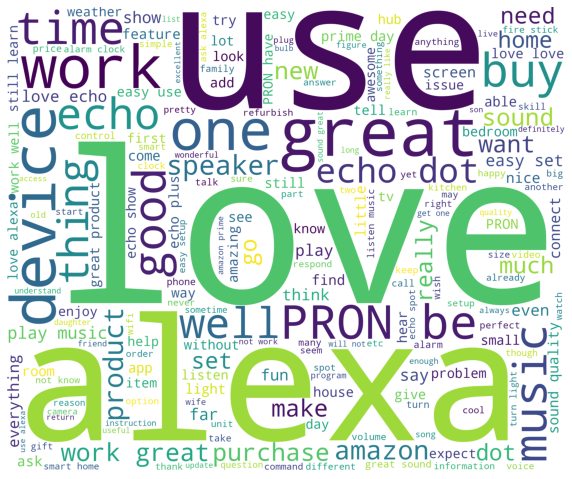

In [19]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',width=2400,height=2000).generate(corpus_cloud)
plt.figure(figsize=(10,14))
plt.imshow(wordcloud)
plt.axis('off')

plt.savefig("alexa_wordcloud.jpg")
plt.show()

In [ ]:
# CHANGE FEEDBACK RATED 0 AS NEGATIVE AND FEEDBACK RATED 1 AS POSITIVE
df["feedback"].replace({0: "negative", 1: "positive"}, inplace=True)
df.head()